For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

1) Has the network latency gone up since we switched internet service providers?


* H0: There has been no chance in latency since we switched internet providers.
* Ha: There has been in increase in latency since we switched interet providers.
* True Negative: After looking at the data, we have deteremined that our latency has not changed.
* True Positive: The new ISP has impacted latency.
* Type 1: We have observed a change in latency; however, there has not been a change in latency.
* Type 2: We have observed no change in latency; however, there has been an impact to latency.

2) Is the website redesign any good?

* H0: There been no change in user retention since the website redesign.
* Ha: There has been a decrease in user churn since the website redesign.
* True Negative: After looking at the data, we have deteremined that the redesign has not impacted customer retention.
* True Positive: The new redesign has impacted customer retention.
* Type 1: We have observed a change in customer retention; however there has not actually been a change in customer retention .
* Type 2: We have observed no change in customer retention; however, there has been a change in customer retention.

3) Is our television ad driving more sales?


* H0: There has been no change in sales since we started having television ads.
* Ha: There has been an increase in sale since we started having television ads.
* True Negative: After looking at the data, we have deteremined that sales have remained steady.
* True Positive: Since launching the television ad campagin sales have been impacted.
* Type 1: We have observed a change in sales; however, this was not caused by the ads.
* Type 2: We have observed no change in sales; however, there was a change in sales.

Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [1]:
import matplotlib as plt
import numpy as np
import pandas as pd
from scipy import stats
from math import sqrt
print("Success!!") 

Success!!


Load the mpg dataset and use it to answer the following questions:

* Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
* Are compact cars more fuel-efficient than the average car?
* Do manual cars get better gas mileage than automatic cars?

In [44]:
from pydataset import data
mpg = data('mpg') 
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [45]:
mpg['avg_miles'] = (mpg['hwy'] + mpg['cty'])/2

In [47]:
x1 = mpg[(mpg.year == 2008)].avg_miles
x2 = mpg[(mpg.year == 1999)].avg_miles
alpha = .05

xbar1 = x1.mean()
xbar2 = x2.mean()

n1 = x1.shape[0]
n2 = x2.shape[0]

s1 = x1.std()
s2 = x2.std()

degf = n1 + n2 - 2

s_p = sqrt(((n1 - 1) * s1**2 + (n2 - 1) * s2**2) / (n1 + n2 - 2))
s_p

standard_error = se = sqrt(s1**2 / n1 + s2**2 / n2)

t = (xbar1 - xbar2) / (s_p * sqrt(1/n1 + 1/n2))

p = stats.t(degf).sf(t) * 2

print(f't = {t}')
print(f'p = {p}')

t, p = stats.ttest_ind(x1, x2)
if p/2 > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")

t = -0.21960177245940962
p = 1.1736255959676423
We fail to reject $H_{0}$


(117,)
(117,)
24.097480106100797
27.122605363984682
is p/2 < alpha?  False
is t > 0?  False
We fail to reject $H_{0}$


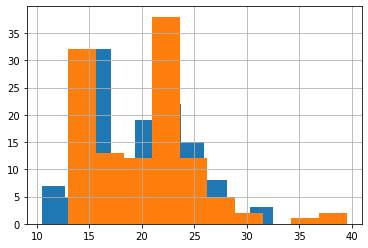

In [42]:
mpg = data('mpg')
mpg_data = pd.DataFrame(mpg)
mpg_data['average_mileage'] = (mpg_data.cty + mpg_data.hwy) / 2
bool_series = mpg.year == 2008
oh_eight = mpg[bool_series]
bool_series = mpg.year == 1999
nine_nine = mpg[bool_series]
oh_eight['average_mileage'].hist()
nine_nine['average_mileage'].hist()
alpha = .05
# of Observations
print(oh_eight.average_mileage.shape)
print(nine_nine.average_mileage.shape)
# Variance (2 Sample T-Test)
print(oh_eight.average_mileage.var())
print(nine_nine.average_mileage.var())
t, p = stats.ttest_ind(oh_eight.average_mileage, nine_nine.average_mileage)
t, p/2
print("is p/2 < alpha? ", p/2 < alpha)
print("is t > 0? ", t > 0)
if p/2 > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")